In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer


In [2]:
# Load the data from Excel
data = pd.read_excel('Airfryer.xlsx')

In [3]:
df = data.sample(1000, random_state=0)

In [4]:
# Text preprocessing
df['tokens'] = df['translatedText'].apply(lambda x: word_tokenize(str(x)) if pd.notnull(x) else [])
df['tokens'] = df['tokens'].apply(lambda x: [token.lower() for token in x])

In [5]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [token for token in x if token not in stop_words])

In [6]:
# Sentiment analysis
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['translatedText'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

In [7]:
# Further analysis
average_sentiment = df['sentiment'].mean()
positive_reviews = df[df['sentiment'] > 0]
negative_reviews = df[df['sentiment'] < 0]
positive_count = len(positive_reviews)
negative_count = len(negative_reviews)

In [8]:
print(average_sentiment)
print(positive_reviews)
print(negative_reviews)
print(positive_count)
print(negative_count)

0.5156729
                                          translatedText       name   
44677  Very good, the quality is really not comparabl...  Airfryers  \
39682  I have received the Philips air fryer and I ha...  Airfryers   
885    Purchased after various reflections, good prod...  Airfryers   
73098  The pot is good, easy to operate and easy to l...  Airfryers   
54108  Received the first roasted pork belly, very qu...  Airfryers   
...                                                  ...        ...   
5395   As soon as I received it, I started to make de...  Airfryers   
26905                                  it is recommended  Airfryers   
65025  Much smaller than the oven, the capacity is in...  Airfryers   
17387  I like it, the size is right, the appearance i...  Airfryers   
29239  Doesn't need preheating, works great. Immediat...  Airfryers   

       Unnamed: 2                   sku country          channel  rating   
44677         NaN  HD9270/91, HD9252/81   China           jd.

In [10]:
import matplotlib.pyplot as plt

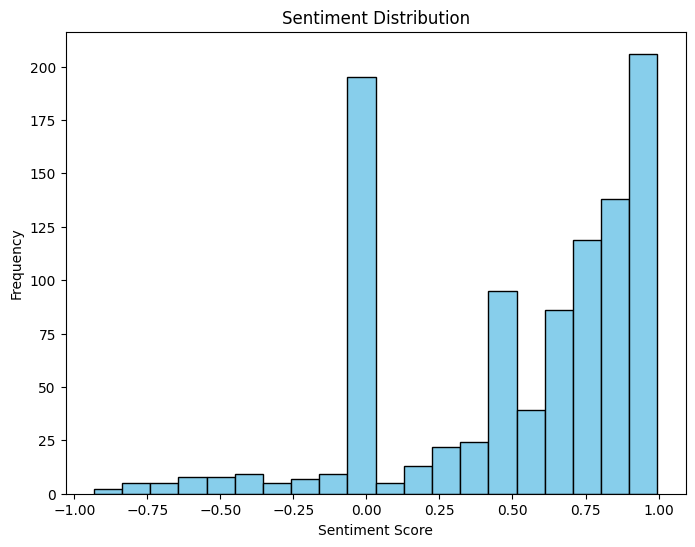

In [11]:
# Plotting
# Sentiment Distribution
plt.figure(figsize=(8, 6))
plt.hist(df['sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution')
plt.show()

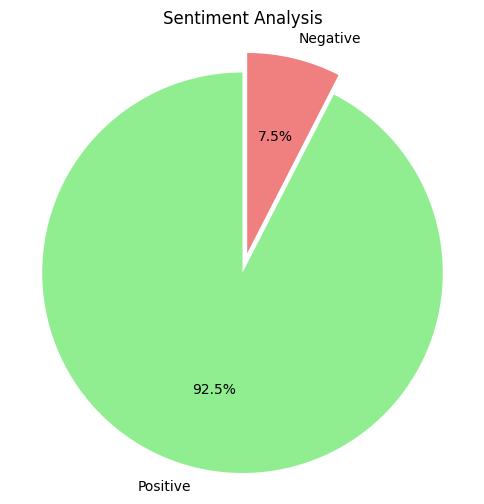

In [12]:
# Sentiment Pie Chart
labels = ['Positive', 'Negative']
sizes = [positive_count, negative_count]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # explode the positive slice

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Analysis')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()